# Get the Data  
- ../datasets/attribute_set/custom_attr.csv  

In [11]:
from helpers import read_csv_with_dtypes 
import pandas as pd 

data = read_csv_with_dtypes("../datasets/attribute_set/custom_attr.csv")

In [12]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Columns: 1001 entries, paths to zippered
dtypes: int8(1000), object(1)
memory usage: 278.0+ MB


In [13]:
data.head() 

,paths,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
LABELS = list(data.columns.values[1:])
LABELS[:5]

['a-line',
 'abstract',
 'abstract chevron',
 'abstract chevron print',
 'abstract diamond']

In [15]:
len(LABELS)

1000

In [16]:
base = "../datasets/big_ds/img-001/" 
base

'../datasets/big_ds/img-001/'

In [17]:
data.paths = data.paths.apply(lambda x: base + x) 
data.head() 

,paths,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
print(data.shape)
data = data.drop_duplicates() 
data.shape

(289222, 1001)


(289222, 1001)

In [19]:
partitions = pd.read_csv("../datasets/attribute_set/list_eval_partition.txt", delim_whitespace=True, header=None, names=["path", "group"]) 
partitions.head() 

,path,group
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test


In [20]:
data.paths[21134], partitions.path[21134]

('../datasets/big_ds/img-001/img/Floral-Embroidered_Blouse/img_00000002.jpg',
 'img/Floral-Embroidered_Blouse/img_00000002.jpg')

In [21]:
data.shape, partitions.shape

((289222, 1001), (289222, 2))

In [22]:
data["group"] = partitions.group
data.head() 

,paths,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,group
0,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
2,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,val
3,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,../datasets/big_ds/img-001/img/Sheer_Pleated-F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


## Handle Attrbute Type 

<b>Attribute Type</b>  
- "1" represents texture-related attributes, 
- "2" represents fabric-related attributes, 
- "3" represents shape-related attributes, 
- "4" represents part-related attributes, 
- "5" represents style-related attributes;

In [23]:
attr = pd.read_csv("../datasets/attribute_set/custom_attr_definitions.csv", index_col=0)
attr.head() 

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [24]:
attr.attribute_type.value_counts().index.to_numpy()

array([5, 2, 4, 3, 1], dtype=int64)

### Part Related Attributes "4"

In [25]:
attr[attr.attribute_type == 4].head() 

,attribute_name,attribute_type
22,arrow collar,4
26,asymmetrical hem,4
31,back bow,4
32,back cutout,4
33,back knit,4


In [26]:
attr[attr.attribute_type == 4].shape 

(216, 2)

In [27]:
import numpy as np 

df_category_4 = data.loc[:,np.concatenate([['paths', 'group'], attr[attr.attribute_type == 4].iloc[:,0].values])]

In [28]:
df_category_4.shape 

(289222, 218)

In [29]:
import matplotlib.pyplot as plt
import seaborn

def create_pi(df):
    zeros = 0
    ones = 0 
    for i in range(2, df.shape[1]):
        zeros = zeros + df.iloc[:, i].value_counts().to_numpy()[0] 
        ones = ones + df.iloc[:, i].value_counts().to_numpy()[1]  

    
    data_m = [ones, zeros]
    keys = ['Positive', 'Negative']
    
    palette_color = seaborn.color_palette('bright')
    plt.pie(data_m, labels=keys, colors=palette_color, autopct='%.0f%%')

    plt.show()

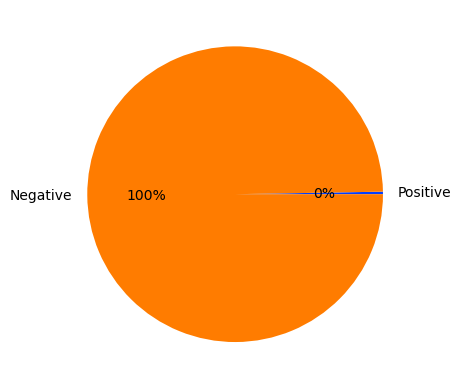

In [30]:
create_pi(df_category_4)

In [31]:
df_category_3 = data.loc[:,np.concatenate([['paths', 'group'], attr[attr.attribute_type == 3].iloc[:,0].values])]
df_category_3.shape 

(289222, 182)

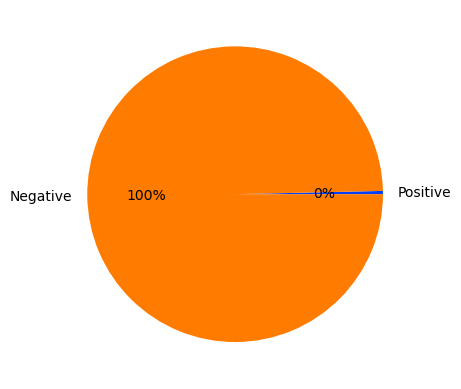

In [32]:
create_pi(df_category_3)

In [33]:
df_category_5 = data.loc[:,np.concatenate([['paths', 'group'], attr[attr.attribute_type == 5].iloc[:,0].values])]
df_category_5.shape 

(289222, 232)

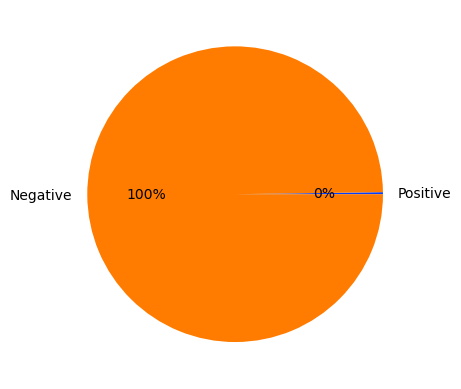

In [34]:
create_pi(df_category_5) 

In [35]:
df_category_5.shape, df_category_3.shape, df_category_4.shape

((289222, 232), (289222, 182), (289222, 218))

# Prepare Data Pipeline by using tf.data 

In [36]:
df_category_3[df_category_3.group == 'train'].shape,  df_category_3[df_category_3.group == 'val'].shape,  df_category_3[df_category_3.group == 'test'].shape

((209222, 182), (40000, 182), (40000, 182))

In [37]:
TRAIN_SIZE = df_category_3[df_category_3.group == 'train'].shape[0]
data = pd.concat([df_category_3[df_category_3.group == 'train'].sample(frac=1),  
                df_category_3[df_category_3.group == 'val'].sample(frac=1)]).reset_index(drop=True).drop(['group'], axis=1)

In [38]:
fnames = data.paths.to_numpy()  
fnames[:5]

array(['../datasets/big_ds/img-001/img/Striped_Chiffon_Blouse/img_00000148.jpg',
       '../datasets/big_ds/img-001/img/Faux_Shearling_Parka/img_00000011.jpg',
       '../datasets/big_ds/img-001/img/Striped_A-Line_Dress/img_00000008.jpg',
       '../datasets/big_ds/img-001/img/Go_Baroque_Trapeze_Dress/img_00000027.jpg',
       '../datasets/big_ds/img-001/img/Beaded_Trim_Mini_Skirt/img_00000004.jpg'],
      dtype=object)

In [39]:
import tensorflow as tf 

ds_size = data.shape[0] 
# number_of_selected_samples = 2000 

filelist_ds = tf.data.Dataset.from_tensor_slices(fnames) 

filelist_ds.cardinality().numpy() 

249222

## Custom tf Helpers 

In [40]:
def get_label(file_path):
    """
        file_path: the file path for the image that you want to select
    """
    labels = data.loc[data.paths == file_path].to_numpy().squeeze()[1:].astype("int64")
    return tf.convert_to_tensor(labels) 

In [41]:
get_label(fnames[100])

<tf.Tensor: shape=(180,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)>

In [42]:
# resize and scale the images so that we can save time in training  
IMG_WIDTH, IMG_HEIGHT = 64, 64 
def decode_img(img):
    """
        img: img is the image 
    """ 
    #color images 
    img = tf.image.decode_jpeg(img, channels=3) 
    img = tf.image.convert_image_dtype(img, tf.float32) 
    img = tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT]) 
    img = img / tf.constant(256, dtype=tf.float32)
    return img

In [43]:
def combine_images_labels(file_path: tf.Tensor): 
    label = get_label(file_path) 
    img = tf.io.read_file(file_path) 
    img = decode_img(img) 
    return img, label 

# Train/Test Split 

In [44]:
train_ratio = 0.80 
ds_train = filelist_ds.take(TRAIN_SIZE) 
ds_test = filelist_ds.skip(TRAIN_SIZE)

In [45]:
BATCH_SIZE = 32 

## Pre-process All the Images 

In [46]:
ds_train = ds_train.map(lambda x: 
                        tf.py_function(func=combine_images_labels, 
                                       inp=[x], # input of the function 
                                       Tout=(tf.float32,tf.int64)),  # return type 
                        num_parallel_calls=tf.data.AUTOTUNE, # parallelizing data extraction 
                        deterministic=False 
                        )

In [47]:
ds_test= ds_test.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

### Prepare Data Pipeline 

- **batch**(): Combines consecutive elements of this dataset into batches.
- **cache**(): Caches the elements in this dataset. he first time the dataset is iterated over, its elements will be cached either in the specified file or in memory.Subsequent iterations will use the cached data.
- **prefetch**(): Creates a Dataset that prefetches elements from this dataset. Most dataset input pipelines should end with a call to *prefetch*. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.
 

In [48]:
ds_train_batched = ds_train.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE) 
ds_test_batched = ds_test.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE) 

In [49]:
ds_train_batched.cardinality().numpy() 

6539

In [50]:
nr_of_classes = len(data.columns) - 1  
nr_of_classes

180

# Models 

## Model 1:Fine Grained VGG16 

In [51]:
from tensorflow import keras 
base_model = keras.applications.VGG16(
    weights="imagenet", # load weights pre-trained on ImageNet. 
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), # VGG16 expects min 32 x 32 
    include_top = False # do not include output layer of the image net vgg 
)
base_model.trainable = False 

In [52]:
inputs = keras.Input(shape=(IMG_WIDTH,IMG_HEIGHT,3))
x = tf.cast(inputs, tf.float32)
x = tf.keras.applications.vgg16.preprocess_input(x)   
x = base_model(x) 
x = keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid  

outputs = keras.layers.Dense(nr_of_classes,
                             kernel_initializer=initializer, 
                             activation=activation)(x) 

model_1 = keras.Model(inputs, outputs) 

In [53]:
model_1.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')])

In [54]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) 
checkpoint_path = "checkpoints/NORMAL_DATASET/Model 1: VGG/checkpoint_VGG_Model_1-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1)

In [ ]:
# model_1.load_weights(previous_checkpoint)

In [55]:
history_model_1 = model_1.fit(ds_train_batched, 
                            epochs=10,
                            validation_data =ds_test_batched,
                            callbacks=[early_stopping, checkpoint_callback]
                            )

Epoch 1/10
  27/6539 [..............................] - ETA: 3740:37:07 - loss: 1.0224 - tp: 151.0000 - fp: 44905.0000 - tn: 110041.0000 - fn: 423.0000 - accuracy: 0.7085 - precision: 0.0034 - recall: 0.2631

In [1]:
model_1.save("../trained_models/IN_SHOP_Models/model_1_vgg.h5") 

NameError: name 'model_1' is not defined

In [ ]:
pd.DataFrame(history_model_1.history).to_csv("../trained_models/IN_SHOP_Models/model_1_vgg_RESULT_2.csv")

## Model 2: Efficient Net 

In [ ]:
efficient_net = tf.keras.applications.EfficientNetB0(include_top=False)
efficient_net.trainable = False

In [ ]:
from tensorflow import keras 
inputs = keras.Input(shape=(IMG_WIDTH,IMG_HEIGHT,3)) 
x = efficient_net(inputs) 
x = keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid  

outputs = keras.layers.Dense(nr_of_classes,
                             kernel_initializer=initializer, 
                             activation=activation)(x) 

model_2 = keras.Model(inputs, outputs) 

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
]

model_2.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=METRICS)

In [ ]:
model_2.load_weights("checkpoints/in-shop_ds_model2/checkpoint_Efficient_Base.ckpt")

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) 
checkpoint_path = "checkpoints/in-shop_ds_model2_STEP_3/checkpoint_Efficient_Base.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1)

In [ ]:
history_model_2 = model_2.fit(ds_train_batched, 
        validation_data =ds_test_batched,
        epochs=10,
        callbacks=[early_stopping, checkpoint_callback])

Epoch 1/10
463/463 [==============================] - ETA: 0s - loss: 0.1703 - tp: 62134.0000 - fp: 42225.0000 - tn: 4811905.0000 - fn: 224888.0000 - accuracy: 0.9480 - precision: 0.5954 - recall: 0.2165
Epoch 1: saving model to checkpoints/in-shop_ds_model2_STEP_3\checkpoint_Efficient_Base.ckpt
463/463 [==============================] - 376s 781ms/step - loss: 0.1703 - tp: 62134.0000 - fp: 42225.0000 - tn: 4811905.0000 - fn: 224888.0000 - accuracy: 0.9480 - precision: 0.5954 - recall: 0.2165 - val_loss: 0.1547 - val_tp: 16258.0000 - val_fp: 6287.0000 - val_tn: 1207245.0000 - val_fn: 55498.0000 - val_accuracy: 0.9519 - val_precision: 0.7211 - val_recall: 0.2266
Epoch 2/10
463/463 [==============================] - ETA: 0s - loss: 0.1516 - tp: 71549.0000 - fp: 30430.0000 - tn: 4823700.0000 - fn: 215473.0000 - accuracy: 0.9522 - precision: 0.7016 - recall: 0.2493
Epoch 2: saving model to checkpoints/in-shop_ds_model2_STEP_3\checkpoint_Efficient_Base.ckpt
463/463 [========================

In [ ]:
model_2.save("../trained_models/IN_SHOP_Models/model_2_efficient_net.h5") 

In [ ]:
pd.DataFrame(history_model_2.history).to_csv("../trained_models/IN_SHOP_Models/model_2_efficient_net_step3.csv")

### Model 2 Fine Tune

In [ ]:
from tensorflow.keras.models import clone_model 

model_2_fine = clone_model(model_2)
model_2_fine.set_weights(model_2.get_weights())

In [ ]:
for layer in model_2_fine.layers: 
    print(layer.trainable,"name:" ,layer.name)

True name: input_8
True name: efficientnetb0
True name: global_average_pooling2d_3
True name: dense_3


In [ ]:
ef_net_for_fine = model_2_fine.layers[1]
model_2_fine.layers[1].name 

'efficientnetb0'

In [ ]:
ef_net_for_fine.trainable = True  

for layer in ef_net_for_fine.layers[:-10]:
    layer.trainable = False 

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
]

model_2_fine.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=METRICS)

In [ ]:
for layer in ef_net_for_fine.layers[-10:]: 
    print(layer.trainable, layer.name)

True block7a_se_squeeze
True block7a_se_reshape
True block7a_se_reduce
True block7a_se_expand
True block7a_se_excite
True block7a_project_conv
True block7a_project_bn
True top_conv
True top_bn
True top_activation


In [ ]:
# model_2_fine.load_weights("checkpoints/in-shop_ds_model2_fine_tune/checkpoint_Efficient_Base.ckpt" )

In [ ]:
checkpoint_path = "checkpoints/in-shop_ds_model2_fine_tune_STEP3/checkpoint_Efficient_Base.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1)

In [ ]:
history_model_2_fine = model_2_fine.fit(ds_train_batched, 
        validation_data =ds_test_batched,
        epochs=20, 
        initial_epoch=history_model_2.epoch[-1], # start from previous last epoch 
        callbacks=[early_stopping, checkpoint_callback])

Epoch 10/20
463/463 [==============================] - ETA: 0s - loss: 0.1437 - tp: 81404.0000 - fp: 38510.0000 - tn: 4815620.0000 - fn: 205618.0000 - accuracy: 0.9525 - precision: 0.6789 - recall: 0.2836
Epoch 10: saving model to checkpoints/in-shop_ds_model2_fine_tune_STEP3\checkpoint_Efficient_Base.ckpt
463/463 [==============================] - 683s 1s/step - loss: 0.1437 - tp: 81404.0000 - fp: 38510.0000 - tn: 4815620.0000 - fn: 205618.0000 - accuracy: 0.9525 - precision: 0.6789 - recall: 0.2836 - val_loss: 0.1428 - val_tp: 22207.0000 - val_fp: 9873.0000 - val_tn: 1203659.0000 - val_fn: 49549.0000 - val_accuracy: 0.9538 - val_precision: 0.6922 - val_recall: 0.3095
Epoch 11/20
463/463 [==============================] - ETA: 0s - loss: 0.1344 - tp: 88316.0000 - fp: 34777.0000 - tn: 4819353.0000 - fn: 198706.0000 - accuracy: 0.9546 - precision: 0.7175 - recall: 0.3077
Epoch 11: saving model to checkpoints/in-shop_ds_model2_fine_tune_STEP3\checkpoint_Efficient_Base.ckpt
463/463 [=====

In [ ]:
model_2_fine.save("../trained_models/IN_SHOP_Models/model_2_efficient_net_fine_tune_STEP_3_OverFitting.h5") 

In [ ]:
pd.DataFrame(history_model_2_fine.history).to_csv("../trained_models/IN_SHOP_Models/model_2_efficient_net_fine_tune_STEP_3_OverFitting.csv")

In [ ]:
pd.DataFrame(history_model_2_fine.history)

,loss,tp,fp,tn,fn,accuracy,precision,recall,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall
0,0.143684,81404.0,38510.0,4815620.0,205618.0,0.952515,0.678853,0.283616,0.142841,22207.0,9873.0,1203659.0,49549.0,0.953768,0.692238,0.309479
1,0.134357,88316.0,34777.0,4819353.0,198706.0,0.954585,0.717474,0.307698,0.142742,22352.0,9425.0,1204107.0,49404.0,0.954229,0.703402,0.311500
2,0.128667,93409.0,33435.0,4820695.0,193613.0,0.955837,0.736408,0.325442,0.143303,23242.0,10334.0,1203198.0,48514.0,0.954214,0.692221,0.323903
3,0.124024,98269.0,32439.0,4821691.0,188753.0,0.956976,0.751821,0.342374,0.142470,23764.0,10718.0,1202814.0,47992.0,0.954322,0.689171,0.331178
4,0.119882,102546.0,31927.0,4822203.0,184476.0,0.957908,0.762577,0.357276,0.141750,23771.0,10945.0,1202587.0,47985.0,0.954150,0.684727,0.331275
5,0.115948,107125.0,31421.0,4822709.0,179897.0,0.958897,0.773209,0.373229,0.141099,24341.0,11483.0,1202049.0,47415.0,0.954175,0.679461,0.339219
6,0.112315,111488.0,31088.0,4823042.0,175534.0,0.959810,0.781955,0.388430,0.141108,24461.0,11545.0,1201987.0,47295.0,0.954220,0.679359,0.340891
7,0.108673,116011.0,30822.0,4823308.0,171011.0,0.960742,0.790088,0.404189,0.143254,23888.0,11460.0,1202072.0,47868.0,0.953841,0.675795,0.332906
8,0.105093,120556.0,30267.0,4823863.0,166466.0,0.961734,0.799321,0.420024,0.147587,24407.0,13945.0,1199587.0,47349.0,0.952311,0.636394,0.340139
9,0.102033,124877.0,30095.0,4824035.0,162145.0,0.962608,0.805804,0.435078,0.149421,24692.0,15471.0,1198061.0,47064.0,0.951346,0.614795,0.344111


### Model 2 Fine Tune: Partitioned Learning Rate and MultiOptimizer 

In [ ]:
int(len(ef_net_for_fine.layers) / 3)

optimizers = [
    keras.optimizers.Adam(), # for layer [0] and last layer 
    tf.keras.optimizers.Adam(learning_rate=1e-6), # ef net [0 to 80] 
    tf.keras.optimizers.Adam(learning_rate=1e-4), # ef net [80 to 160] 
    tf.keras.optimizers.Adam(learning_rate=1e-2), # # ef net [160 to :ef net last] 
]

In [ ]:
optimizers_and_layers = [
    (optimizers[0], model_2_fine.layers[0]), 
    (optimizers[1], ef_net_for_fine.layers[0:80]), 
    (optimizers[2], ef_net_for_fine.layers[80:160]),
    (optimizers[3], ef_net_for_fine.layers[160:]),
    (optimizers[0], model_2_fine.layers[-1]),   
]

In [ ]:
#!pip install tensorflow-addons

In [ ]:
import tensorflow_addons as tfa
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)

In [ ]:
model_2_fine_multi_optimizer = clone_model(model_2)
model_2_fine_multi_optimizer.set_weights(model_2.get_weights())
ef_net_for_fine = model_2_fine_multi_optimizer.layers[1]


ef_net_for_fine.trainable = True  
for layer in ef_net_for_fine.layers[:-20]:
    layer.trainable = False 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
]

model_2_fine_multi_optimizer.compile(optimizer=optimizer,
                    loss=keras.losses.BinaryCrossentropy(), 
                    metrics=METRICS)

checkpoint_path = "checkpoints/in-shop_ds_model2_fine_tune_STEP3/checkpoint_Efficient_multi_optimizer.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1)

history_model_2_fine_multi_optimizer = model_2_fine_multi_optimizer.fit(ds_train_batched, 
        validation_data =ds_test_batched,
        epochs=20, 
        initial_epoch=history_model_2.epoch[-1], # start from previous last epoch 
        callbacks=[early_stopping, checkpoint_callback])

Epoch 10/20
463/463 [==============================] - ETA: 0s - loss: 0.1640 - tp: 62854.0000 - fp: 34782.0000 - tn: 4819348.0000 - fn: 224168.0000 - accuracy: 0.9496 - precision: 0.6438 - recall: 0.2190
Epoch 10: saving model to checkpoints/in-shop_ds_model2_fine_tune_STEP3\checkpoint_Efficient_multi_optimizer.ckpt
463/463 [==============================] - 923s 2s/step - loss: 0.1640 - tp: 62854.0000 - fp: 34782.0000 - tn: 4819348.0000 - fn: 224168.0000 - accuracy: 0.9496 - precision: 0.6438 - recall: 0.2190 - val_loss: 0.1847 - val_tp: 23622.0000 - val_fp: 26388.0000 - val_tn: 1187144.0000 - val_fn: 48134.0000 - val_accuracy: 0.9420 - val_precision: 0.4723 - val_recall: 0.3292
Epoch 11/20
463/463 [==============================] - ETA: 0s - loss: 0.1522 - tp: 72100.0000 - fp: 31394.0000 - tn: 4822736.0000 - fn: 214922.0000 - accuracy: 0.9521 - precision: 0.6967 - recall: 0.2512
Epoch 11: saving model to checkpoints/in-shop_ds_model2_fine_tune_STEP3\checkpoint_Efficient_multi_optimi

In [ ]:
pd.DataFrame(history_model_2_fine_multi_optimizer.history)

,loss,tp,fp,tn,fn,accuracy,precision,recall,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall
0,0.164045,62854.0,34782.0,4819348.0,224168.0,0.949632,0.643758,0.218987,0.184724,23622.0,26388.0,1187144.0,48134.0,0.942019,0.472346,0.329199
1,0.152166,72100.0,31394.0,4822736.0,214922.0,0.952089,0.696659,0.251200,0.161577,22868.0,16983.0,1196549.0,48888.0,0.948750,0.573838,0.318691
2,0.147187,77463.0,31800.0,4822330.0,209559.0,0.953054,0.708959,0.269885,0.150965,20596.0,10242.0,1203290.0,51160.0,0.952227,0.667877,0.287028
3,0.143618,81525.0,32170.0,4821960.0,205497.0,0.953772,0.717050,0.284037,0.151777,20872.0,10587.0,1202945.0,50884.0,0.952173,0.663467,0.290875
4,0.140713,84860.0,32149.0,4821981.0,202162.0,0.954424,0.725243,0.295657,0.152079,19638.0,8253.0,1205279.0,52118.0,0.953029,0.704098,0.273677
5,0.137965,87954.0,32270.0,4821860.0,199068.0,0.955003,0.731584,0.306436,0.149519,18706.0,7240.0,1206292.0,53050.0,0.953092,0.720959,0.260689
6,0.135585,90566.0,32054.0,4822076.0,196456.0,0.955553,0.738591,0.315537,0.149828,17895.0,6485.0,1207047.0,53861.0,0.953049,0.734003,0.249387
7,0.133192,93211.0,32287.0,4821843.0,193811.0,0.956022,0.742729,0.324752,0.151381,17940.0,7053.0,1206479.0,53816.0,0.952642,0.717801,0.250014
8,0.131001,95398.0,32008.0,4822122.0,191624.0,0.956502,0.748772,0.332372,0.149976,18722.0,7389.0,1206143.0,53034.0,0.952989,0.717016,0.260912
9,0.128652,97957.0,32003.0,4822127.0,189065.0,0.957000,0.753747,0.341287,0.148263,19931.0,8035.0,1205497.0,51825.0,0.953427,0.712687,0.277761
